In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from os import getcwd
np.set_printoptions(suppress=True)

In [2]:
src_data = np.random.random(100) * 10
src_data

array([8.75070591, 8.46984836, 9.61453532, 7.37258067, 4.6017177 ,
       2.53132041, 9.27443742, 7.02766548, 6.58282091, 4.61623192,
       3.1027824 , 1.71074567, 8.90803794, 5.57993981, 2.20948158,
       0.86853204, 4.77834092, 3.40315253, 8.04314229, 4.1754375 ,
       0.17786166, 5.49726362, 0.30304293, 8.84428968, 4.05358925,
       5.87332087, 7.75071509, 4.76042371, 4.54325229, 9.88046945,
       6.2081028 , 3.60206112, 0.09696167, 1.50759915, 2.825671  ,
       8.11403488, 3.63281328, 8.29288447, 2.89104579, 3.60560058,
       0.23011112, 3.48553151, 7.12790108, 5.5359016 , 4.50042617,
       2.12808581, 7.42997575, 3.24624506, 7.27351366, 3.28158165,
       1.29853677, 8.74243773, 1.25913514, 2.91743361, 7.36133541,
       5.50707596, 9.68102118, 8.95776414, 2.90762223, 7.54653991,
       8.78765449, 9.35042769, 5.89603184, 5.51551273, 0.87389428,
       8.99685079, 2.47293557, 1.63021682, 1.11319018, 3.72642695,
       7.63684669, 5.09614949, 7.20499406, 2.35921548, 0.52732

In [3]:
data1 = np.mat([[i/10,src_data[i]] for i in range(len(src_data))])
data1

matrix([[0.        , 8.75070591],
        [0.1       , 8.46984836],
        [0.2       , 9.61453532],
        [0.3       , 7.37258067],
        [0.4       , 4.6017177 ],
        [0.5       , 2.53132041],
        [0.6       , 9.27443742],
        [0.7       , 7.02766548],
        [0.8       , 6.58282091],
        [0.9       , 4.61623192],
        [1.        , 3.1027824 ],
        [1.1       , 1.71074567],
        [1.2       , 8.90803794],
        [1.3       , 5.57993981],
        [1.4       , 2.20948158],
        [1.5       , 0.86853204],
        [1.6       , 4.77834092],
        [1.7       , 3.40315253],
        [1.8       , 8.04314229],
        [1.9       , 4.1754375 ],
        [2.        , 0.17786166],
        [2.1       , 5.49726362],
        [2.2       , 0.30304293],
        [2.3       , 8.84428968],
        [2.4       , 4.05358925],
        [2.5       , 5.87332087],
        [2.6       , 7.75071509],
        [2.7       , 4.76042371],
        [2.8       , 4.54325229],
        [2.9  

In [4]:
data = np.mat([[0.0, 7.8031236401009165], [0.1, 4.426411521373964], [0.2, 8.947706236035394], [0.3, 8.200555461071133], [0.4, 0.5142706050449086], [0.5, 3.1008492860590753], [0.6, 7.1785370142703], [0.7, 3.872126889453009], [0.8, 1.025577102380758], [0.9, 4.833507884197839], [1.0, 0.9345186488455648], [1.1, 4.812032669803522], [1.2, 3.4191665496674375], [1.3, 0.022961590431520573], [1.4, 0.8785497842851486], [1.5, 3.2381682303766004], [1.6, 6.663617230163021], [1.7, 0.9093960835056158], [1.8, 3.680521995791508], [1.9, 4.900535080573809], [2.0, 0.5937324344804573], [2.1, 7.783916463844781], [2.2, 7.11179421378249], [2.3, 2.4446164389372083], [2.4, 0.31413070861756043], [2.5, 8.793728586574554], [2.6, 5.826793655403399], [2.7, 5.694595209349293], [2.8, 1.810999124588204], [2.9, 2.5891746519869896], [3.0, 7.989527941362203], [3.1, 3.8888255411877237], [3.2, 6.980965568743198], [3.3, 6.183466511452052], [3.4, 8.994788345820844], [3.5, 7.713561865457374], [3.6, 5.373007398355321], [3.7, 5.857041801728861], [3.8, 1.2873991273003293], [3.9, 7.90280175406894], [4.0, 2.114965228889154], [4.1, 1.9122653164064485], [4.2, 1.430294828685612], [4.3, 6.447866312224862], [4.4, 1.6034730966952893], [4.5, 5.020523561692603], [4.6, 8.434230931666896], [4.7, 8.926232142246732], [4.8, 7.21575735052221], [4.9, 0.8242497089572909], [5.0, 3.2773727950676923], [5.1, 4.789459791385374], [5.2, 5.7771008824695205], [5.3, 5.475006081618368], [5.4, 0.1095089272289862], [5.5, 3.708028945757401], [5.6, 5.868541457709577], [5.7, 3.82129152340557], [5.8, 4.672995214563882], [5.9, 7.139883221140032], [6.0, 1.9266318905278135], [6.1, 8.37752018393436], [6.2, 0.38698741212173093], [6.3, 6.809020238683873], [6.4, 6.7650503938175754], [6.5, 3.622205528236381], [6.6, 6.2275067570806755], [6.7, 9.272360909999943], [6.8, 6.937813473353321], [6.9, 6.719818328095723], [7.0, 4.1761213627699085], [7.1, 2.2186584343523554], [7.2, 4.325155968720139], [7.3, 6.346030576482492], [7.4, 6.681255604404174], [7.5, 0.9022441439624651], [7.6, 3.5585144004608313], [7.7, 3.0389210408048797], [7.8, 1.2906111157619915], [7.9, 5.5836998346201785], [8.0, 9.35888445552132], [8.1, 7.895786013311998], [8.2, 8.908751780051233], [8.3, 0.5462991244242466], [8.4, 5.430329386519083], [8.5, 5.632137779391064], [8.6, 8.919006991403911], [8.7, 1.881419639976668], [8.8, 0.8227664012604219], [8.9, 6.551076298674367], [9.0, 0.8128558657766949], [9.1, 3.8227215510033807], [9.2, 5.628006555285536], [9.3, 7.4386834204408645], [9.4, 3.7984910271263073], [9.5, 4.012712837404079], [9.6, 9.755417444517088], [9.7, 2.8443889672100973], [9.8, 4.143513529213513], [9.9, 4.093044136223663]])


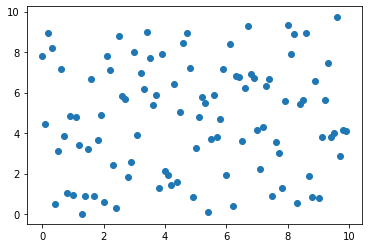

In [5]:
plt.scatter(np.squeeze(np.array(data[:,0:1])),np.squeeze(np.array(data[:,-1:])))

In [6]:
def quarterback_method(vector):
    '''四分位法'''
    lower_q=np.quantile(vector,0.25,interpolation='lower')#下四分卫数
    higher_q=np.quantile(vector,0.75,interpolation='higher')#上四分位数
    middle_q = np.median(vector) #中位数
    int_r=higher_q-lower_q#四分位距
    numbers = [lower_q,middle_q,higher_q,int_r] #分位数整理
    data = [vector[vector<i] for i in numbers][:-1] #前75%分位的数
    new_data = np.setdiff1d(vector,np.hstack((data[1],data[2]))) #后25分位的数
    return numbers,data+[new_data] #分位数和四分位后的数据

In [7]:

def K_point(number):
    '''随机选择K中心'''
    K = lambda : data[np.random.randint(len(data))]
    return [np.array(K())[0] for i in range(number)]   

k_of_constant = K_point(6)
print(k_of_constant)

[array([7.2       , 4.32515597]), array([2.8       , 1.81099912]), array([2.1       , 7.78391646]), array([1.7       , 0.90939608]), array([8.2       , 8.90875178]), array([1.1       , 4.81203267])]


In [8]:
def euclidean_distance(pointA,pointB):
    '''欧式距离计算公式'''
    return np.array(np.sqrt(np.dot(np.power((pointA-pointB),2),np.ones(2))))[0]
euclidean_distance(data,K_point(4)[0])


array([ 7.29982045,  3.92362671,  8.43580681,  7.68693534,  0.        ,
        2.58851101,  6.66726681,  3.37123106,  0.64917974,  4.34808126,
        0.73253561,  4.35439534,  3.01304173,  1.02537044,  1.06428348,
        2.93762119,  6.26533829,  1.35872151,  3.46195723,  4.63565702,
        1.60197197,  7.46577196,  6.83866345,  2.70854851,  2.00998905,
        8.54162891,  5.75003488,  5.66795933,  2.72791218,  3.24888085,
        7.91451023,  4.32176133,  7.04685346,  6.36787109,  8.99550894,
        7.83835408,  5.81784524,  6.27974554,  3.48679333,  8.17559738,
        3.93982529,  3.95529888,  3.90884898,  7.10053223,  4.14564375,
        6.09231612,  8.96469584,  9.44727987,  8.01685254,  4.5106637 ,
        5.36607247,  6.35352206,  7.1230178 ,  6.97272518,  5.01635645,
        6.01748223,  7.4637937 ,  6.24711032,  6.81578978,  8.61096641,
        5.77535838,  9.71188416,  5.80139647,  8.62750676,  8.66442427,
        6.84611273,  8.43095886, 10.78861186,  9.0676294 ,  8.98

$$\bar{X}=\frac{1}{r} \sum_{i=1}^{r} \bar{X}_{i}=\frac{1}{n} \sum_{i=1}^{r} \sum_{j=1}^{n_{i}} X_{i j}$$

In [9]:
def error_sum_of_squares(point,K):
    '''误差平方和'''
    return  np.log2(k - point).sum()

In [10]:
def K_means(dataset,K_point,restart=0):
    '''
    递归完成K-means,2维数据
    '''
    print('restart',restart)

    expr1 = [( np.array(i)[0] ,[euclidean_distance(j,np.array(i)) for j in K_point]  ) for i in dataset]
    #nearly = sorted([( expr1[i][-1].index(min(expr1[i][-1])) , list(np.array(dataset[i])[0]) ) for i in range(len(expr1))]) #最近的点的下标
    
    NK = -1
    classified_of_data = []
    new_K_point = []
    for kindex in range(len(K_point)):
        NK+=1
        kindex = []
        for i in range(len(expr1)):
            Name = expr1[i][-1].index(min(expr1[i][-1]))
            data = list(np.array(dataset[i])[0]) #最近的点的下标
            if Name == NK :
                kindex.append(data)
            else:
                pass

        new_K_point.append(mean_point(np.mat(kindex))) #新的k点整理数据结构
        classified_of_data.append(np.mat(kindex)) 


    comparison_of_K = (np.array(K_point)==np.array(new_K_point)).astype(int)#比较两次K点组，并将结果布尔值转为整数
    
    restart_time = 0

    if sum(np.dot(comparison_of_K,np.array([1,1])))==len(K_point)*2: #如果满足分类条件则输出结果
        print('Ok')
        return np.array(new_K_point),classified_of_data
    else: #如果不满足分类条件，则递归继续
        restart += 1
        return K_means(dataset,new_K_point,restart)
        

In [11]:
def K_means_run(class_number,all_datas,drawing=False):
    k_of_constant = K_point(class_number)
    result = K_means(all_datas,k_of_constant,0)

    if drawing == True:
        for data,k in zip(result[-1],result[0]):
            x ,y  = np.squeeze(np.array(data[:,0:1])),np.squeeze(np.array(data[:,-1:]))#,
            plt.scatter(x,y)
            plt.scatter(k[0],k[-1],c='black',marker='x',alpha=1.0)
        plt.show()
        plt.close()
    else:
        pass
    return result

#K_means_run(6,data,True)
data

matrix([[0.        , 7.80312364],
        [0.1       , 4.42641152],
        [0.2       , 8.94770624],
        [0.3       , 8.20055546],
        [0.4       , 0.51427061],
        [0.5       , 3.10084929],
        [0.6       , 7.17853701],
        [0.7       , 3.87212689],
        [0.8       , 1.0255771 ],
        [0.9       , 4.83350788],
        [1.        , 0.93451865],
        [1.1       , 4.81203267],
        [1.2       , 3.41916655],
        [1.3       , 0.02296159],
        [1.4       , 0.87854978],
        [1.5       , 3.23816823],
        [1.6       , 6.66361723],
        [1.7       , 0.90939608],
        [1.8       , 3.680522  ],
        [1.9       , 4.90053508],
        [2.        , 0.59373243],
        [2.1       , 7.78391646],
        [2.2       , 7.11179421],
        [2.3       , 2.44461644],
        [2.4       , 0.31413071],
        [2.5       , 8.79372859],
        [2.6       , 5.82679366],
        [2.7       , 5.69459521],
        [2.8       , 1.81099912],
        [2.9  

In [12]:

def K_means2(dataset,K_point,restart=0):
    '''标准计算循环完成K-means,误差平方和版本'''
    print('restart',restart)

    expr1 = [( np.array(i)[0] ,[euclidean_distance(j,np.array(i)) for j in K_point]  ) for i in dataset]
    
    NK = -1
    classified_of_data = []
    new_K_point = []
    for kindex in range(len(K_point)):
        NK+=1
        kindex = []
        for i in range(len(expr1)):
            Name = expr1[i][-1].index(min(expr1[i][-1]))
            data = list(np.array(dataset[i])[0]) #最近的点的下标
            if Name == NK:
                kindex.append(data)
            else:
                pass

        new_K_point.append(mean_point(np.mat(kindex))) #新的k点整理数据结构
        classified_of_data.append(np.mat(kindex)) 

    if error_sum_of_squares(np.array(K_point) , np.array(new_K_point)) ==0: #误差平方和
        print('Ok')
        return np.array(new_K_point),classified_of_data
    else: #如果不满足分类条件，则递归继续
        restart += 1
        return K_means(dataset,new_K_point,restart)
        


In [13]:
K_means(data,k_of_constant,0)

restart 0


NameError: name 'mean_point' is not defined

In [14]:
def K_means_run2(class_number,all_datas,drawing=False):
    k_of_constant = K_point(class_number)
    result = K_means2(all_datas,k_of_constant,0)

    if drawing == True:
        for data,k in zip(result[-1],result[0]):
            x ,y  = np.squeeze(np.array(data[:,0:1])),np.squeeze(np.array(data[:,-1:]))#,
            plt.scatter(x,y)
            plt.scatter(k[0],k[-1],c='black',marker='x',alpha=1.0)
        plt.show()
        plt.close()
    else:
        pass
    return result

K_means_run2(6,data,True)

restart 0


NameError: name 'mean_point' is not defined

In [15]:
def K_Medoide(dataset, K_point,comparison,restart=0):
    '''
    递归完成K-中心点,2维数据
    '''
    print('restart', restart)
    comparison_of_K_set = []
    comparison_of_K_set.append(comparison)

    expr1 = [(np.array(i)[0], [euclidean_distance(j, np.array(i)) for j in K_point]) for i in dataset]

    NK = -1
    classified_of_data = []
    new_K_point = []
    for kindex in range(len(K_point)):
        NK += 1
        kindex = []
        for i in range(len(expr1)):
            Name = expr1[i][-1].index(min(expr1[i][-1]))
            data = list(np.array(dataset[i])[0])  # 最近的点的下标
            if Name == NK:
                kindex.append(data)
            else:
                pass

        new_K_point.append(kindex[len(kindex)//2])  # 随机选择当前类中的一个点
        classified_of_data.append(np.mat(kindex))


    comparison_of_K = abs(np.array(np.dot((K_point - np.mat(new_K_point)) , np.array([1,1])))[0].sum()) # 比较两次K点组，并将结果布尔值转为整数
    comparison_of_K_set.append(comparison_of_K)

    if comparison_of_K == False :  # 如果满足分类条件则输出结果
        print('Ok,K-Medoide,k中心点算法')
        return np.array(new_K_point), classified_of_data
    else:  # 如果不满足分类条件，则递归继续
        restart += 1
        print(comparison_of_K_set)
        return K_Medoide(dataset, np.mat(new_K_point),comparison_of_K, restart)



def K_Medoide_run(class_number, all_datas, drawing=False):
    '''
    运行K-means函数并选择是否作图
    :param class_number:
    :param all_datas:
    :param drawing:
    :return:
    '''
    k_of_constant = K_point(class_number)
    result = K_Medoide(all_datas, k_of_constant, 0)

    if drawing == True:
        for data, k in zip(result[-1], result[0]):
            x, y = np.squeeze(np.array(data[:, 0:1])), np.squeeze(np.array(data[:, -1:]))  # ,
            plt.scatter(x, y)
            plt.scatter(k[0], k[-1], c='black', marker='x', alpha=1.0)
        plt.show()
        plt.close()
    return result